In [ ]:
pip install tensorflow opencv-python


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Correct the file path to end with .keras
checkpoint = ModelCheckpoint('colorization_model.keras', save_best_only=True, monitor='val_loss')

# Add EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with callbacks
model.fit(x_train_gray, x_train, epochs=5, batch_size=128, validation_data=(x_test_gray, x_test), callbacks=[early_stopping, checkpoint])


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 93s 191ms/step - loss: 0.0209 - val_loss: 0.0066
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 142ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 140ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 146ms/step - loss: 0.0054 - val_loss: 0.0054


In [ ]:
pip install --upgrade tensorflow


In [ ]:
checkpoint = ModelCheckpoint('colorization_model.keras', save_best_only=True, monitor='val_loss', save_weights_only=False)

x_train_gray shape: (50000, 32, 32, 1)
x_train shape: (50000, 32, 32, 3)
x_test_gray shape: (10000, 32, 32, 1)
x_test shape: (10000, 32, 32, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 32, 32, 3)           │           6,915 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,151,171 (4.39 MB)

 Trainable params: 1,151,171 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 146ms/step - loss: 0.0208 - val_loss: 0.0060
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 140ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 144ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 146ms/step - loss: 0.0054 - val_loss: 0.0053
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step


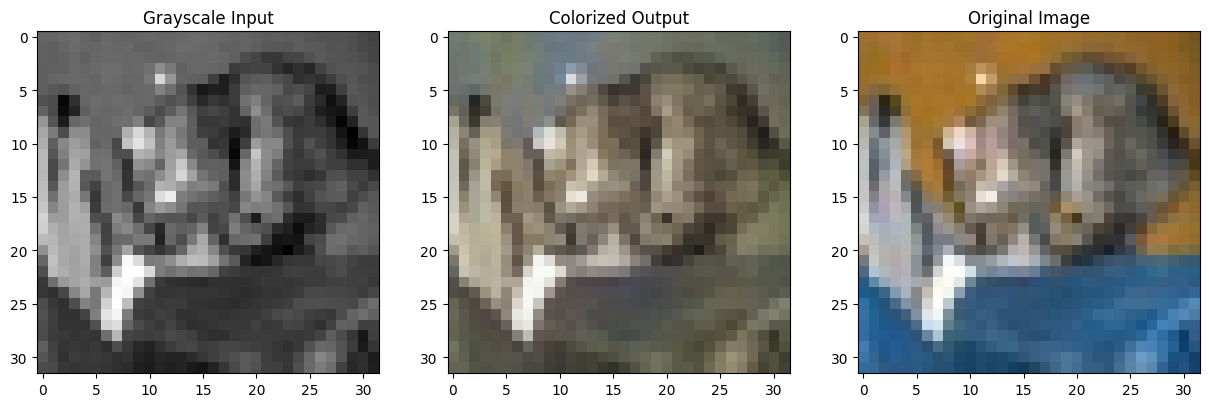

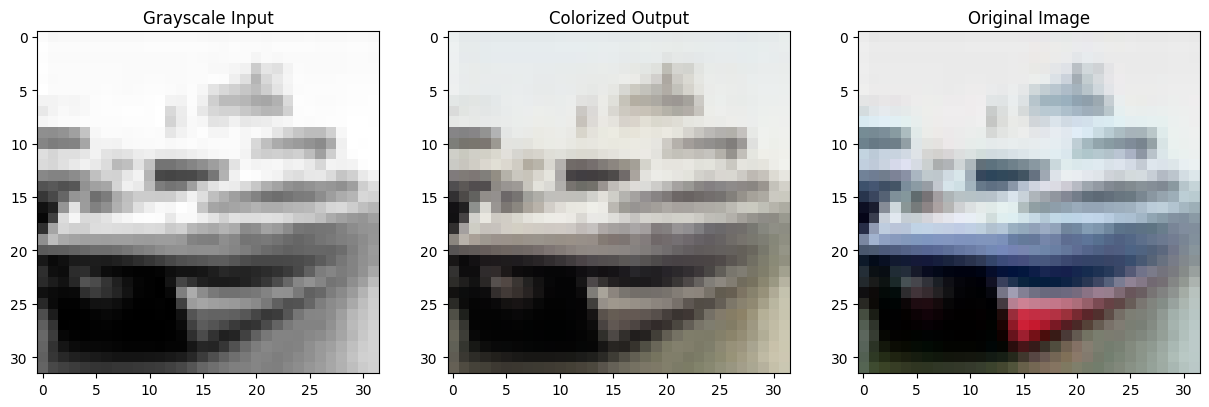

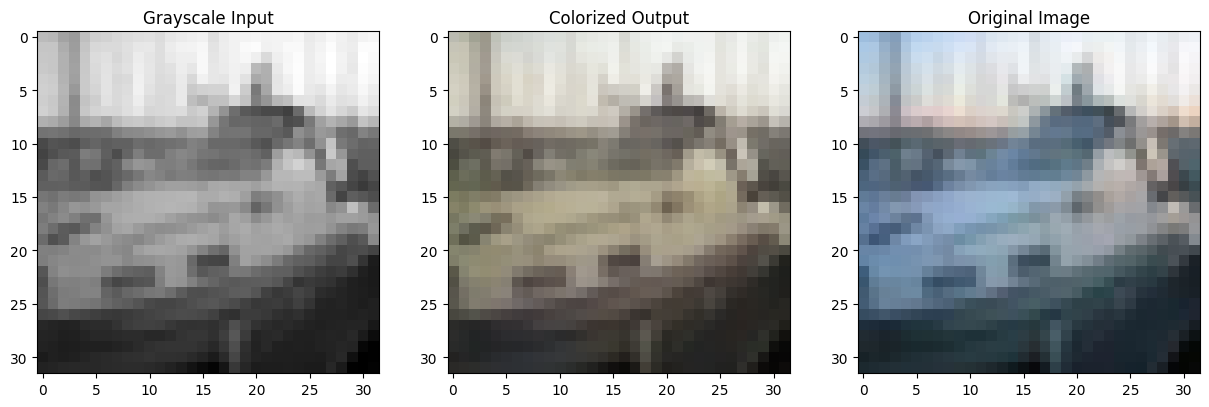

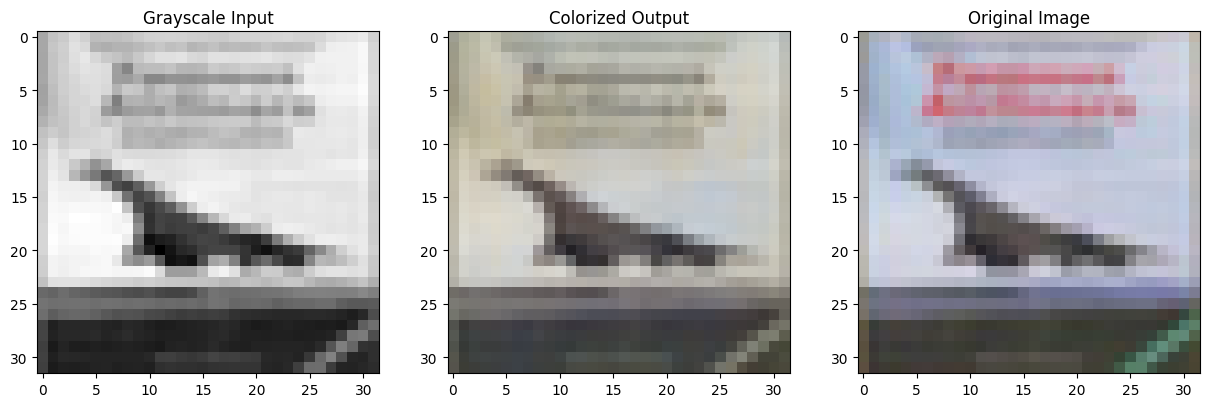

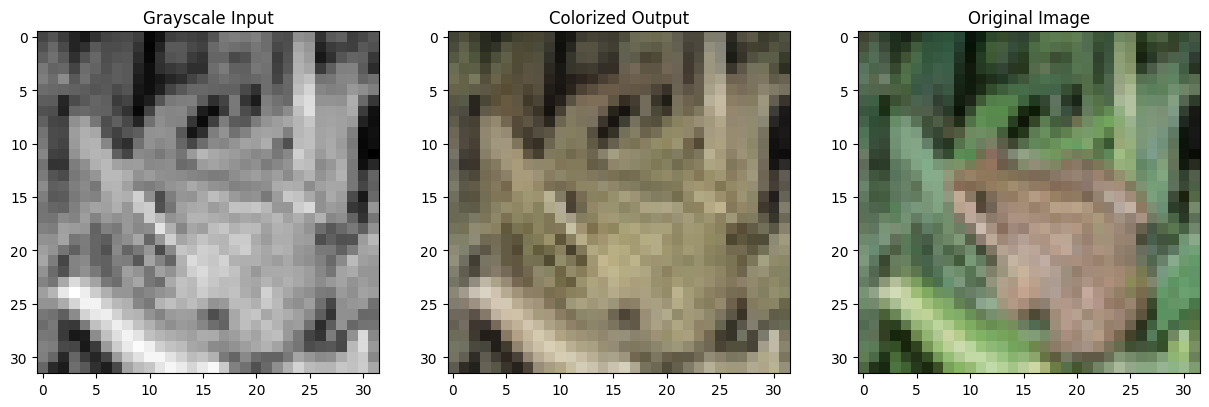

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert to grayscale images
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_test_gray = tf.image.rgb_to_grayscale(x_test)

# Print shapes to verify
print("x_train_gray shape:", x_train_gray.shape)
print("x_train shape:", x_train.shape)
print("x_test_gray shape:", x_test_gray.shape)
print("x_test shape:", x_test.shape)

# Build the CNN Model
model = Sequential([
    InputLayer(input_shape=(32, 32, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output layer with 3 channels (RGB)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Add EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('colorization_model.keras', save_best_only=True, monitor='val_loss', save_weights_only=False)
# Reduce number of epochs for faster testing
model.fit(x_train_gray, x_train, epochs=5, batch_size=128, validation_data=(x_test_gray, x_test), callbacks=[early_stopping, checkpoint])

# Test the model
output = model.predict(x_test_gray)

# Display the results
def display_images(grayscale_input, colorized_output, original):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(tf.squeeze(grayscale_input), cmap='gray')
    ax[0].set_title('Grayscale Input')
    ax[1].imshow(colorized_output)
    ax[1].set_title('Colorized Output')
    ax[2].imshow(original)
    ax[2].set_title('Original Image')
    plt.show()

# Display some sample images
for i in range(5):
    display_images(x_test_gray[i], output[i], x_test[i])


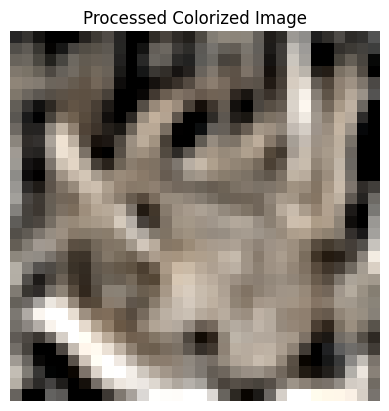

In [ ]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter

# Function to denoise an image
def denoise_image(image):
    return gaussian_filter(image, sigma=1)

# Function to sharpen an image
def sharpen_image(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

# Example usage
colorized_image = output[4]  # Assuming 'output' contains colorized images

# Denoise and sharpen
colorized_image_denoised = denoise_image(colorized_image)
colorized_image_sharpened = sharpen_image(colorized_image_denoised)

# Display the processed image
import matplotlib.pyplot as plt

plt.imshow(colorized_image_sharpened)
plt.title('Processed Colorized Image')
plt.axis('off')
plt.show()


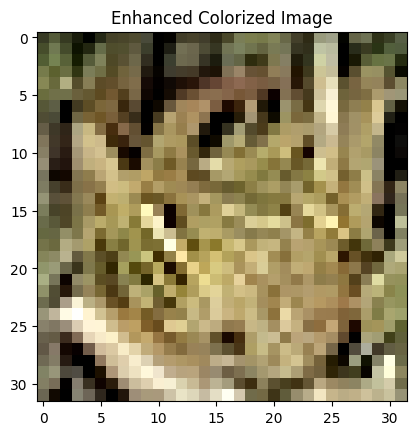

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter

# Function to apply unsharp masking
def unsharp_mask(image, sigma=1.0, strength=1.5):
    blurred = gaussian_filter(image, sigma=sigma)
    sharpened = image + strength * (image - blurred)
    return np.clip(sharpened, 0, 1)

# Example usage
colorized_image = output[4]  # Assuming 'output' contains colorized images
# Apply unsharp mask
colorized_image_sharpened = unsharp_mask(colorized_image)

# Display the processed image
import matplotlib.pyplot as plt

plt.imshow(colorized_image_sharpened)
plt.title('Enhanced Colorized Image')
plt.axis('on')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input, MaxPooling2D, Concatenate
from tensorflow.keras.models import Model

def unet_model(input_shape):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = Concatenate()([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = Concatenate()([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = Concatenate()([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = Concatenate()([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(3, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Create U-Net model
model = unet_model((32, 32, 1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 32, 32, 64)     │            640 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 32, 32, 64)     │         36,928 │ conv2d_28[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 16, 16, 64)     │              0 │ conv2d_29[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 16, 16, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 16, 16, 128)    │        147,584 │ conv2d_30[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 8, 8, 128)      │              0 │ conv2d_31[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 8, 8, 256)      │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_33 (Conv2D)        │ (None, 8, 8, 256)      │        590,080 │ conv2d_32[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 4, 4, 256)      │              0 │ conv2d_33[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_34 (Conv2D)        │ (None, 4, 4, 512)      │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_35 (Conv2D)        │ (None, 4, 4, 512)      │      2,359,808 │ conv2d_34[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 2, 2, 512)      │              0 │ conv2d_35[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_36 (Conv2D)        │ (None, 2, 2, 1024)     │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_37 (Conv2D)        │ (None, 2, 2, 1024)     │      9,438,208 │ conv2d_36[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 4, 4, 512)      │      2,097,664 │ conv2d_37[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concaten

 Total params: 31,030,723 (118.37 MB)

 Trainable params: 31,030,723 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

x_train_gray shape: (50000, 32, 32, 1)
x_train shape: (50000, 32, 32, 3)
x_test_gray shape: (10000, 32, 32, 1)
x_test shape: (10000, 32, 32, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)                   │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 32, 32, 3)           │           6,915 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,151,171 (4.39 MB)

 Trainable params: 1,151,171 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 141ms/step - loss: 0.0173 - val_loss: 0.0061
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 141ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 147ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 141ms/step - loss: 0.0054 - val_loss: 0.0054
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


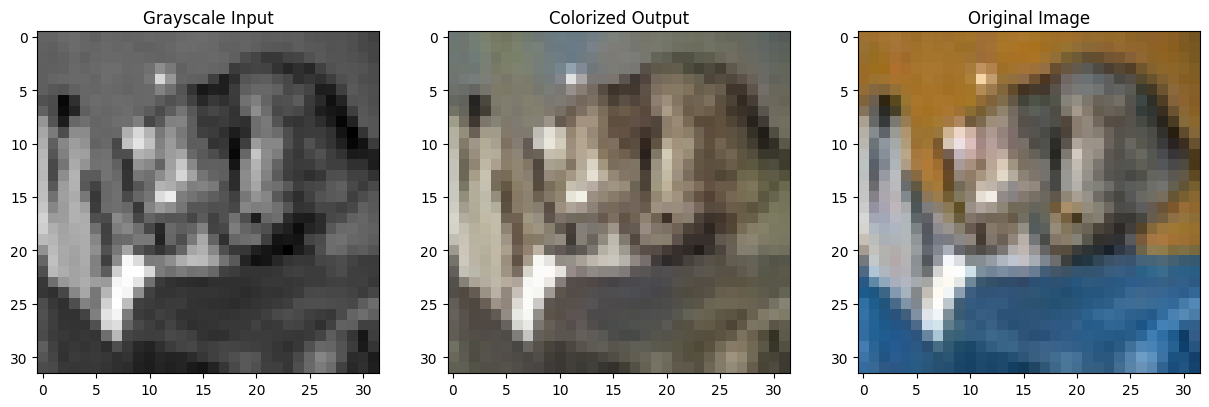

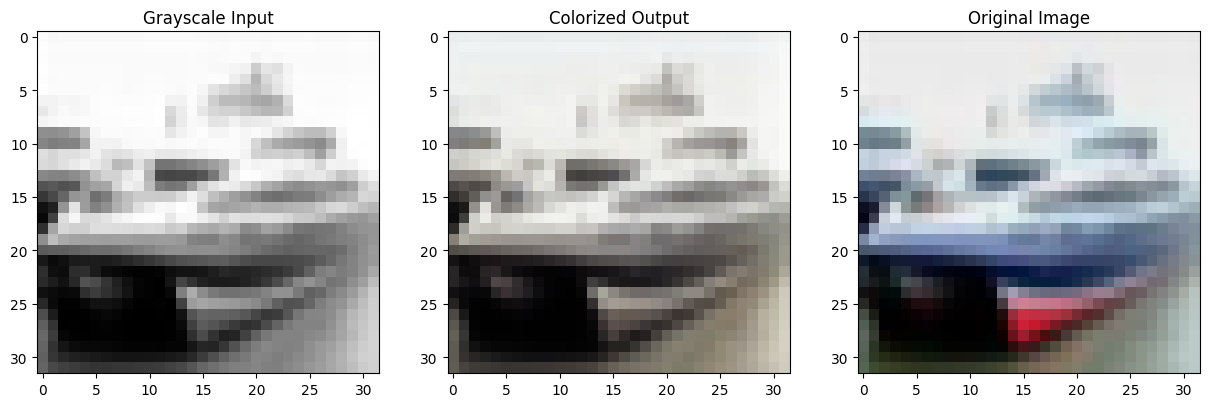

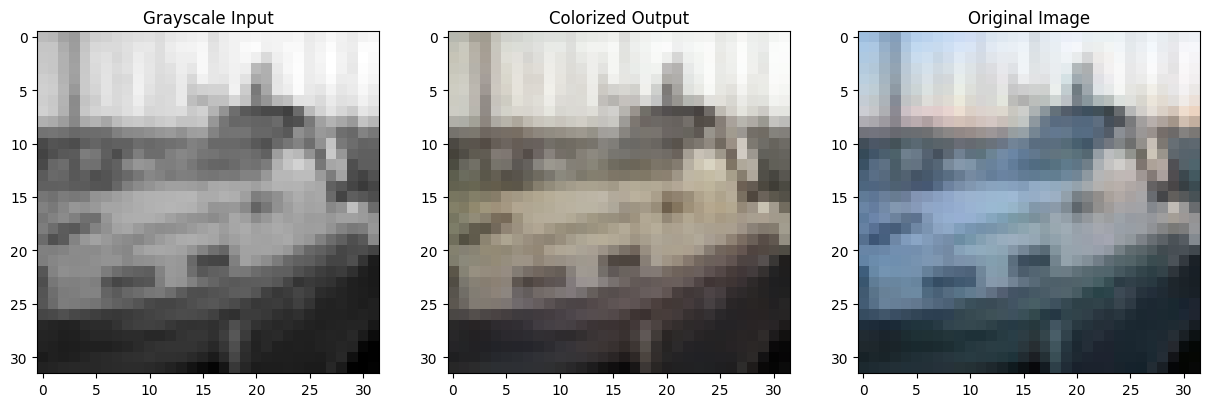

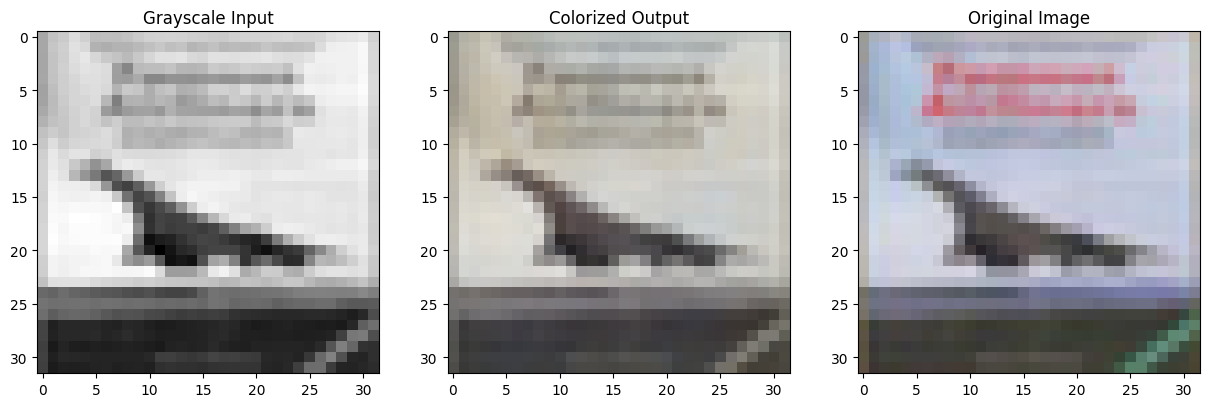

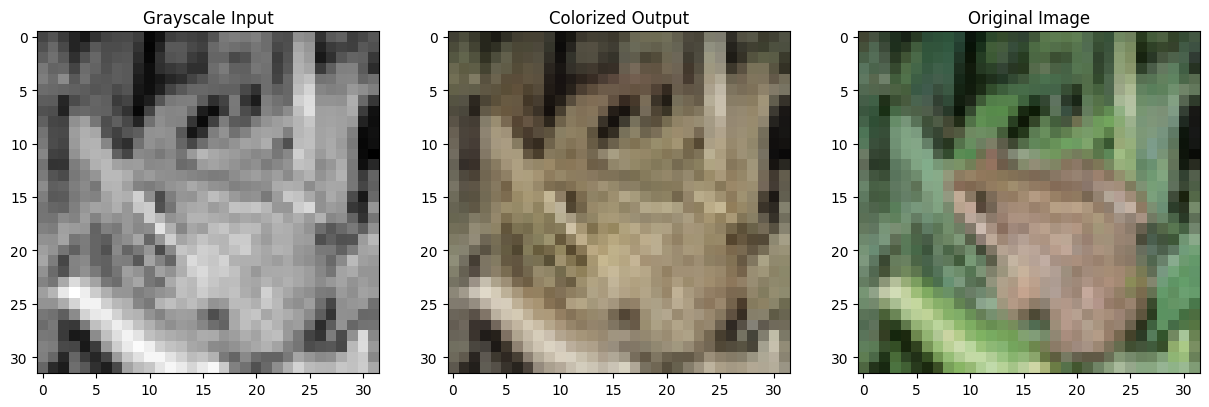

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np--+++
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert to grayscale images
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_test_gray = tf.image.rgb_to_grayscale(x_test)

# Print shapes to verify
print("x_train_gray shape:", x_train_gray.shape)
print("x_train shape:", x_train.shape)
print("x_test_gray shape:", x_test_gray.shape)
print("x_test shape:", x_test.shape)

# Build the CNN Model
model = Sequential([
    InputLayer(input_shape=(32, 32, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output layer with 3 channels (RGB)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Add EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('colorization_model.keras', save_best_only=True, monitor='val_loss', save_weights_only=False)
# Reduce number of epochs for faster testing
model.fit(x_train_gray, x_train, epochs=5, batch_size=128, validation_data=(x_test_gray, x_test), callbacks=[early_stopping, checkpoint])

# Test the model
output = model.predict(x_test_gray)

# Display the results
def display_images(grayscale_input, colorized_output, original):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(tf.squeeze(grayscale_input), cmap='gray')
    ax[0].set_title('Grayscale Input')
    ax[1].imshow(colorized_output)
    ax[1].set_title('Colorized Output')
    ax[2].imshow(original)
    ax[2].set_title('Original Image')
    plt.show()

# Display some sample images
for i in range(5):
    display_images(x_test_gray[i], output[i], x_test[i])

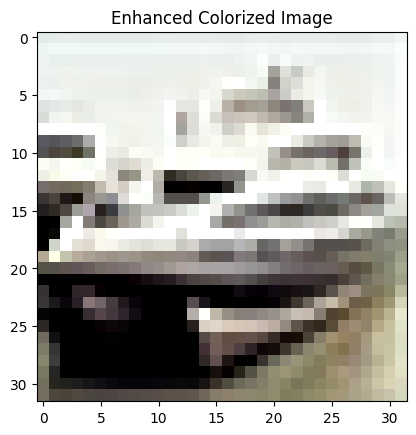

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter

# Function to apply unsharp masking
def unsharp_mask(image, sigma=1.0, strength=1.5):
    blurred = gaussian_filter(image, sigma=sigma)
    sharpened = image + strength * (image - blurred)
    return np.clip(sharpened, 0, 1)

# Example usage
colorized_image = output[1]  # Assuming 'output' contains colorized images
# Apply unsharp mask
colorized_image_sharpened = unsharp_mask(colorized_image)

# Display the processed image
import matplotlib.pyplot as plt

plt.imshow(colorized_image_sharpened)
plt.title('Enhanced Colorized Image')
plt.axis('on')
plt.show()


(-0.5, 31.5, 31.5, -0.5)

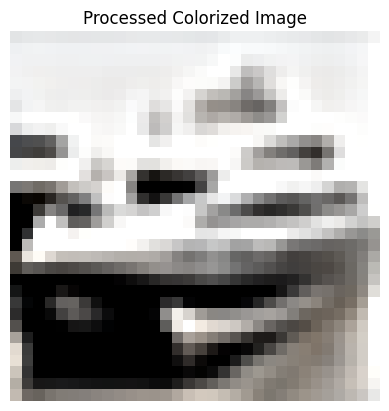

In [ ]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter

# Function to denoise an image
def denoise_image(image):
    return gaussian_filter(image, sigma=1)

# Function to sharpen an image
def sharpen_image(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

# Example usage
colorized_image = output[1]  # Assuming 'output' contains colorized images

# Denoise and sharpen
colorized_image_denoised = denoise_image(colorized_image)
colorized_image_sharpened = sharpen_image(colorized_image_denoised)

# Display the processed image
import matplotlib.pyplot as plt

plt.imshow(colorized_image_sharpened)
plt.title('Processed Colorized Image')
plt.axis('off')

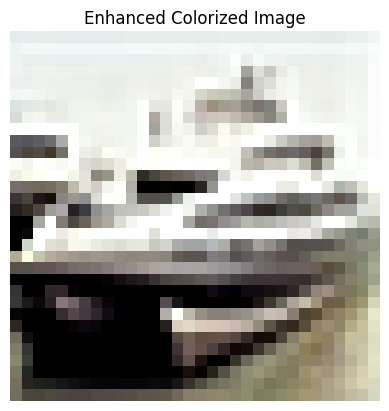

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Function to apply unsharp masking
def unsharp_mask(image, sigma=1.0, strength=1.5):
    # Ensure the image is in the range [0, 1]
    if image.max() > 1:
        image = image / 255.0

    blurred = gaussian_filter(image, sigma=sigma)
    sharpened = image + strength * (image - blurred)
    return np.clip(sharpened, 0, 1)

# Example usage
colorized_image = output[1]  # Assuming 'output' contains colorized images

# Apply unsharp mask
colorized_image_sharpened = unsharp_mask(colorized_image)

# Display the processed image
plt.imshow(colorized_image_sharpened)
plt.title('Enhanced Colorized Image')
plt.axis('off')  # Hide axes for cleaner display
plt.show()


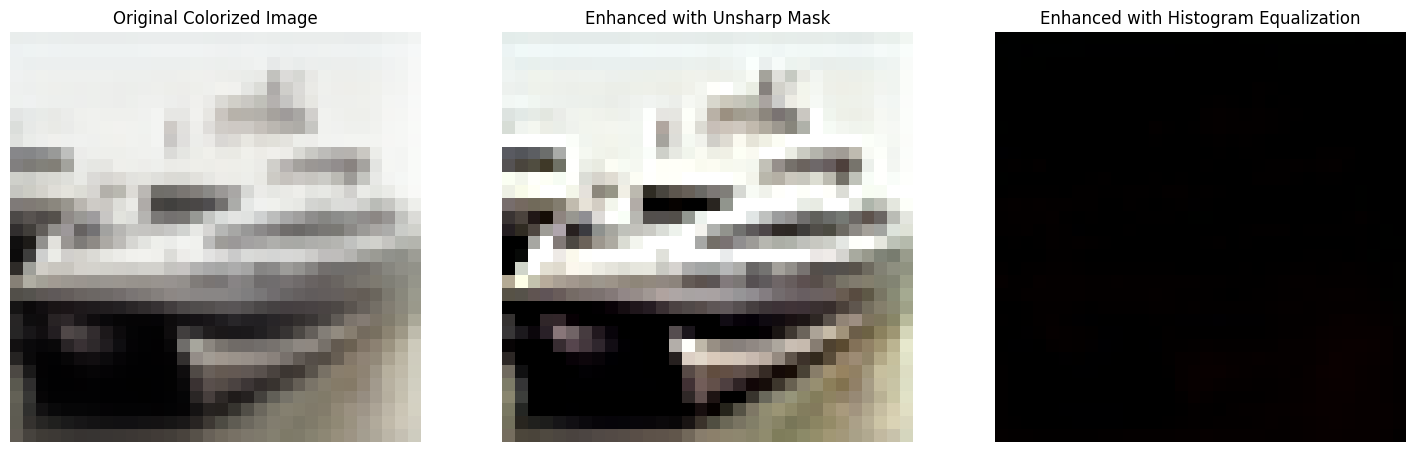

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Function to apply unsharp masking
def unsharp_mask(image, sigma=1.0, strength=1.5):
    # Ensure the image is in the range [0, 1]
    if image.max() > 1:
        image = image / 255.0

    blurred = gaussian_filter(image, sigma=sigma)
    sharpened = image + strength * (image - blurred)
    return np.clip(sharpened, 0, 1)

# Function to apply histogram equalization
def histogram_equalization(image):
    # Convert image to YUV color space
    yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    # Apply histogram equalization on the Y channel
    # Convert Y channel to 8-bit grayscale before equalization
    yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0].astype(np.uint8))  # Convert to 8-bit
    # Convert back to RGB color space
    equalized = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)
    return np.clip(equalized, 0, 1)

# Example usage
colorized_image = output[1]  # Assuming 'output' contains colorized images

# Apply unsharp mask
colorized_image_sharpened = unsharp_mask(colorized_image)

# Apply histogram equalization
colorized_image_equalized = histogram_equalization(colorized_image)

# Display the processed and enhanced images
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Original Colorized Image
ax[0].imshow(colorized_image)
ax[0].set_title('Original Colorized Image')
ax[0].axis('off')

# Enhanced Image with Unsharp Masking
ax[1].imshow(colorized_image_sharpened)
ax[1].set_title('Enhanced with Unsharp Mask')
ax[1].axis('off')

# Enhanced Image with Histogram Equalization--
ax[2].imshow(colorized_image_equalized)
ax[2].set_title('Enhanced with Histogram Equalization')
ax[2].axis('off')

plt.show()

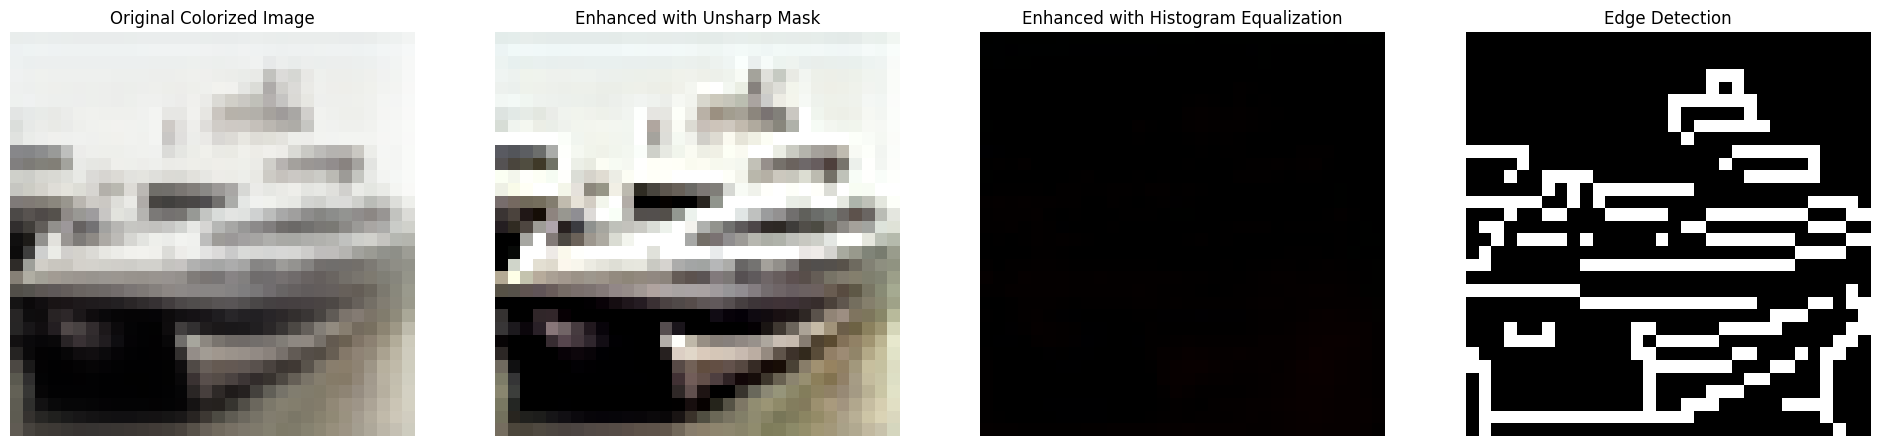

In [ ]:
# Function to apply edge detection
def edge_detection(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Apply Canny edge detection
    edges = cv2.Canny((gray * 255).astype(np.uint8), 100, 200)
    # Convert edges to RGB for display
    edges_rgb = np.stack([edges] * 3, axis=-1) / 255.0
    return edges_rgb

# Function to apply noise reduction
def noise_reduction(image):
    # Apply Gaussian blur to reduce noise
    return cv2.GaussianBlur(image, (5, 5), 0)

# Apply edge detection
colorized_image_edges = edge_detection(colorized_image)

# Apply noise reduction
colorized_image_denoised = noise_reduction(colorized_image)

# Display the processed images with additional features
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

# Original Colorized Image
ax[0].imshow(colorized_image)
ax[0].set_title('Original Colorized Image')
ax[0].axis('off')

# Enhanced Image with Unsharp Masking
ax[1].imshow(colorized_image_sharpened)
ax[1].set_title('Enhanced with Unsharp Mask')
ax[1].axis('off')

# Enhanced Image with Histogram Equalization
ax[2].imshow(colorized_image_equalized)
ax[2].set_title('Enhanced with Histogram Equalization')
ax[2].axis('off')

# Edge Detection
ax[3].imshow(colorized_image_edges)
ax[3].set_title('Edge Detection')
ax[3].axis('off')

plt.show()


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import zoom

def apply_zoom(image, zoom_factor):
    # Apply zoom effect to the image
    zoomed_image = zoom(image, (zoom_factor, zoom_factor, 1), order=1)
    # Crop to original size
    center = [s // 2 for s in image.shape]
    crop_start = [int(center[i] - image.shape[i] // 2) for i in range(2)]
    crop_end = [int(center[i] + image.shape[i] // 2) for i in range(2)]
    return zoomed_image[crop_start[0]:crop_end[0], crop_start[1]:crop_end[1]]

# Example usage
colorized_image = output[4]  # Assuming 'output' contains colorized images

# Create a sequence of zoomed images
num_frames = 30
zoom_factors = np.linspace(1.0, 1.5, num_frames)
images = []

for zoom_factor in zoom_factors:
    zoomed_image = apply_zoom(colorized_image, zoom_factor)
    images.append((zoomed_image * 255).astype(np.uint8))

# Save images as GIF
gif_filename = 'zoom_animation.gif'
image_list = [Image.fromarray(img) for img in images]
image_list[0].save(gif_filename, save_all=True, append_images=image_list[1:], optimize=False, duration=100, loop=0)

print(f"Animation saved as {gif_filename}")


Animation saved as zoom_animation.gif


In [ ]:
import cv2
import numpy as np
from PIL import Image

def apply_rotation(image, angle):
    # Get the image dimensions
    (h, w) = image.shape[:2]
    # Compute the center of the image
    center = (w // 2, h // 2)
    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h))
    return rotated_image

# Create a sequence of rotated images
num_frames = 30
angles = np.linspace(0, 360, num_frames)
images = []

for angle in angles:
    rotated_image = apply_rotation(colorized_image, angle)
    images.append((rotated_image * 255).astype(np.uint8))

# Save images as GIF
gif_filename = 'rotation_animation.gif'
image_list = [Image.fromarray(img) for img in images]
image_list[0].save(gif_filename, save_all=True, append_images=image_list[1:], optimize=False, duration=100, loop=0)

print(f"Animation saved as {gif_filename}")


Animation saved as rotation_animation.gif


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert to grayscale images
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_test_gray = tf.image.rgb_to_grayscale(x_test)

# Print shapes to verify
print("x_train_gray shape:", x_train_gray.shape)
print("x_train shape:", x_train.shape)
print("x_test_gray shape:", x_test_gray.shape)
print("x_test shape:", x_test.shape)

# Build the CNN Model
model = Sequential([
    InputLayer(input_shape=(32, 32, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output layer with 3 channels (RGB)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Add EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('colorization_model.keras', save_best_only=True, monitor='val_loss', save_weights_only=False)
# Reduce number of epochs for faster testing
model.fit(x_train_gray, x_train, epochs=5, batch_size=128, validation_data=(x_test_gray, x_test), callbacks=[early_stopping, checkpoint])

# Test the model
output = model.predict(x_test_gray)

# Display the results
def display_images(grayscale_input, colorized_output, original):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(tf.squeeze(grayscale_input), cmap='gray')
    ax[0].set_title('Grayscale Input')
    ax[1].imshow(colorized_output)
    ax[1].set_title('Colorized Output')
    ax[2].imshow(original)
    ax[2].set_title('Original Image')
    plt.show()

# Display some sample images
for i in range(5):
    display_images(x_test_gray[i], output[i], x_test[i])


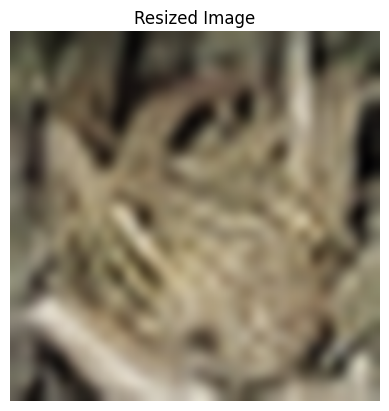

In [ ]:

from PIL import Image

def resize_image(image, new_size):
    # Convert NumPy array to PIL Image
    pil_image = Image.fromarray((image * 255).astype(np.uint8))
    # Resize the image with high-quality resampling
    resized_image = pil_image.resize(new_size, Image.LANCZOS)
    return np.array(resized_image) / 255.0

# Example usage
new_size = (512, 512)  # New size (width, height)
resized_image = resize_image(colorized_image, new_size)

# Display the resized image
plt.imshow(resized_image)
plt.title('Resized Image')
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 152ms/step - loss: 0.0160 - val_loss: 0.0065
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 143ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 148ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 146ms/step - loss: 0.0055 - val_loss: 0.0054
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


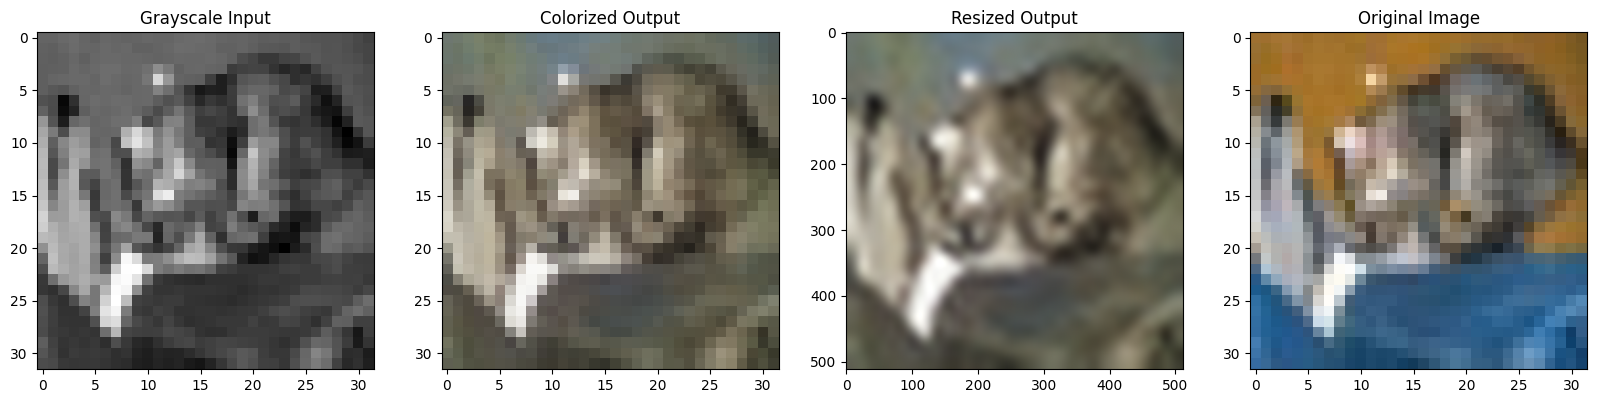

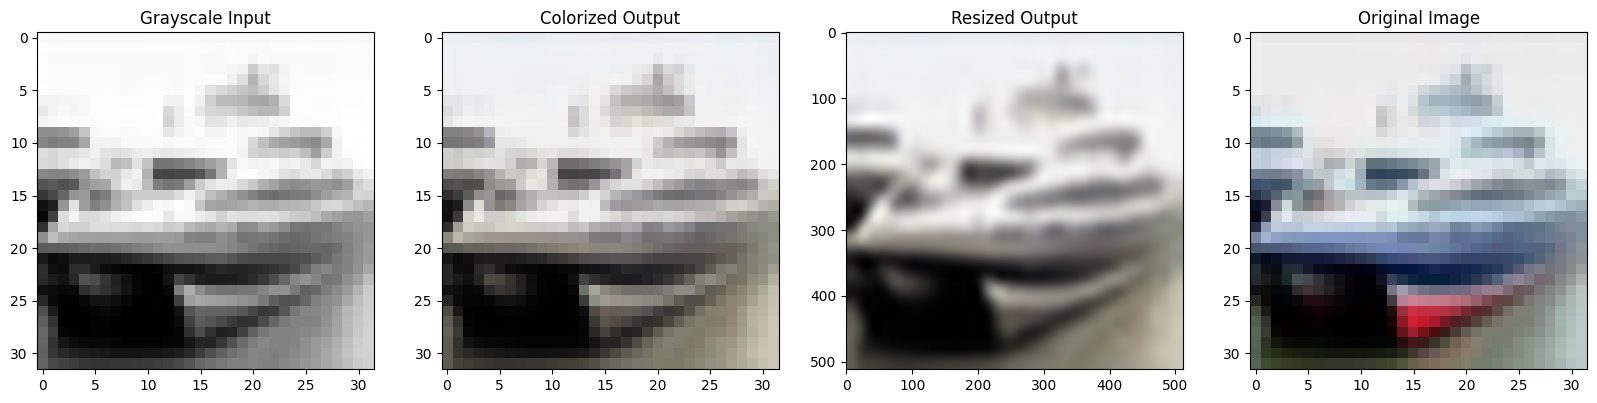

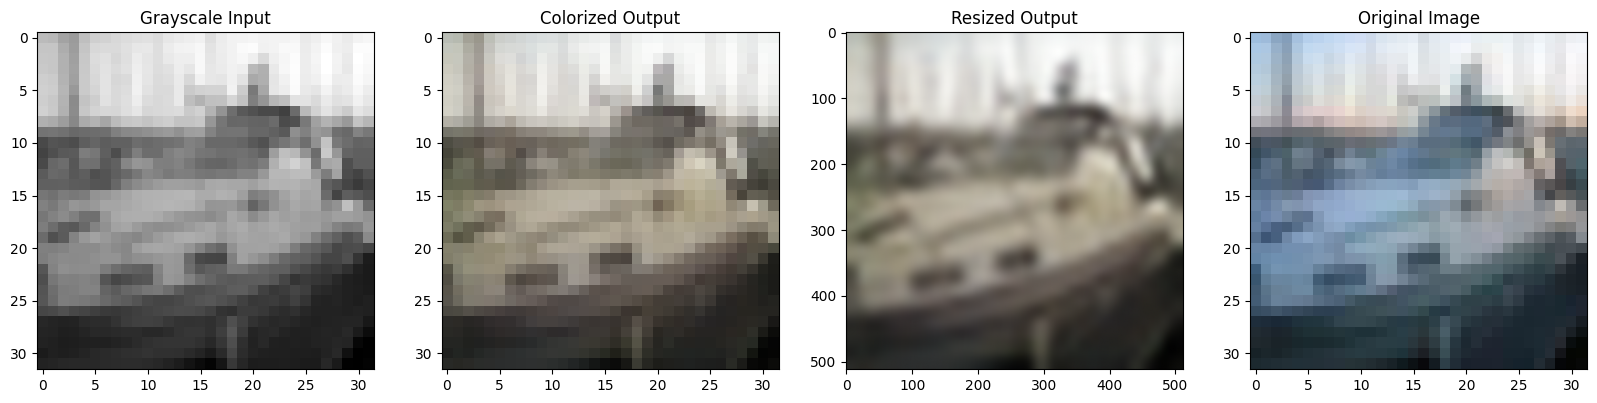

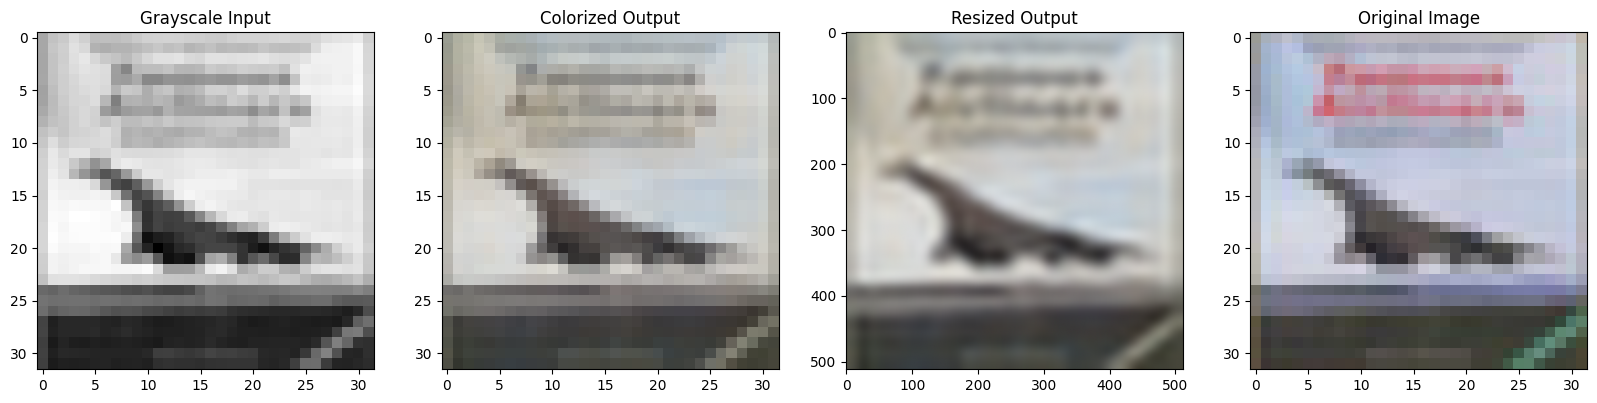

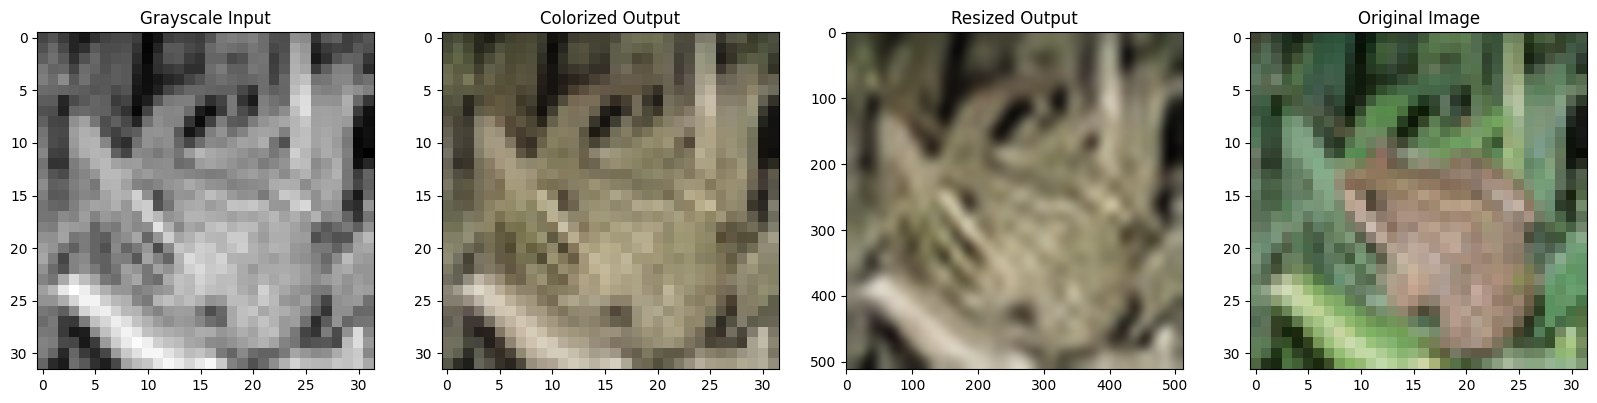

In [ ]:
'''this is a modified code for the colorization of image with increased text size '''
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from PIL import Image

# Load CIFAR-10 data
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert to grayscale images
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_test_gray = tf.image.rgb_to_grayscale(x_test)

# Build the CNN Model
model = Sequential([
    InputLayer(input_shape=(32, 32, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output layer with 3 channels (RGB)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with EarlyStopping and ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('colorization_model.keras', save_best_only=True, monitor='val_loss', save_weights_only=False)

model.fit(x_train_gray, x_train, epochs=5, batch_size=128, validation_data=(x_test_gray, x_test), callbacks=[early_stopping, checkpoint])

# Test the model
output = model.predict(x_test_gray)

# Resize function
def resize_image(image, new_size):
    pil_image = Image.fromarray((image * 255).astype(np.uint8))
    resized_image = pil_image.resize(new_size, Image.LANCZOS)
    return np.array(resized_image) / 255.0

# Display the results
def display_images(grayscale_input, colorized_output, resized_output, original):
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(tf.squeeze(grayscale_input), cmap='gray')
    ax[0].set_title('Grayscale Input')
    ax[1].imshow(colorized_output)
    ax[1].set_title('Colorized Output')
    ax[2].imshow(resized_output)
    ax[2].set_title('Resized Output')
    ax[3].imshow(original)
    ax[3].set_title('Original Image')
    plt.show()

# Display some sample images
for i in range(5):
    colorized_image = output[i]
    resized_image = resize_image(colorized_image, (512, 512))
    display_images(x_test_gray[i], colorized_image, resized_image, x_test[i])


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 145ms/step - loss: 0.0166 - val_loss: 0.0061
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 140ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 142ms/step - loss: 0.0055 - val_loss: 0.0053
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


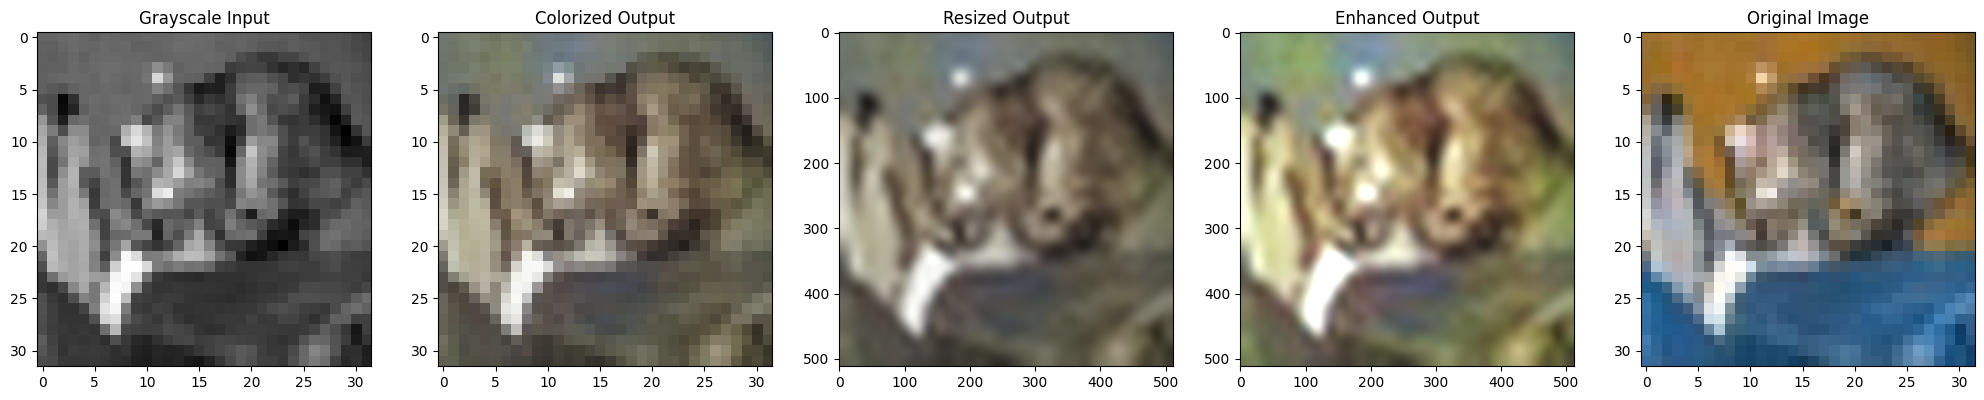

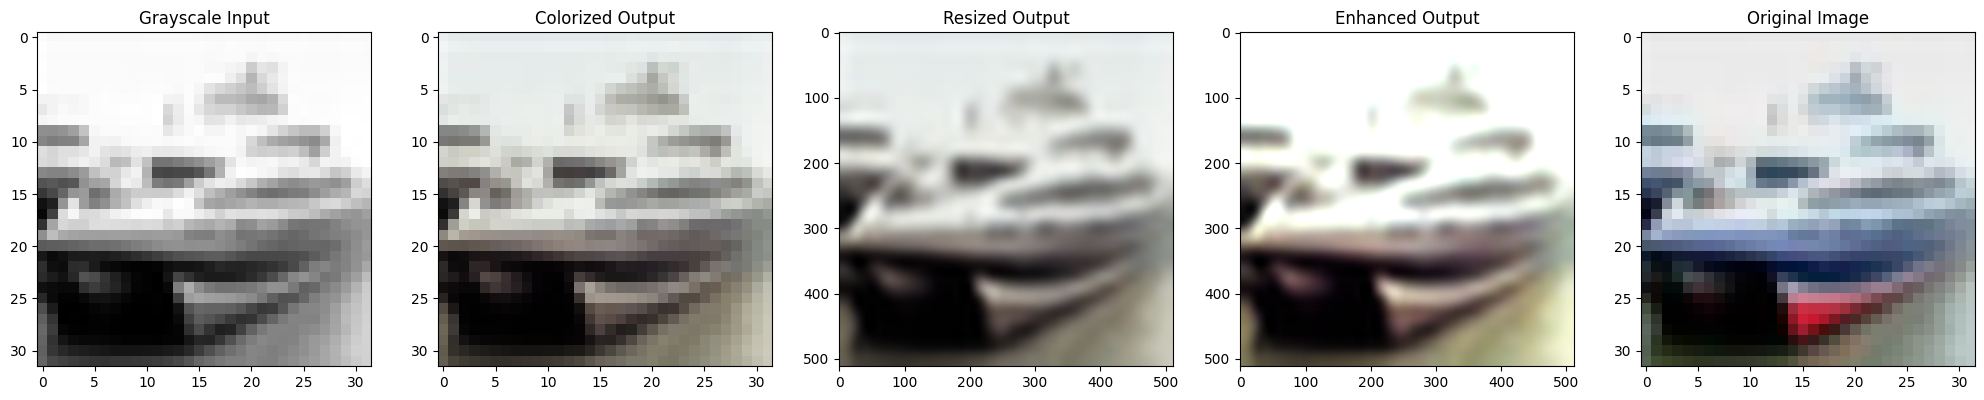

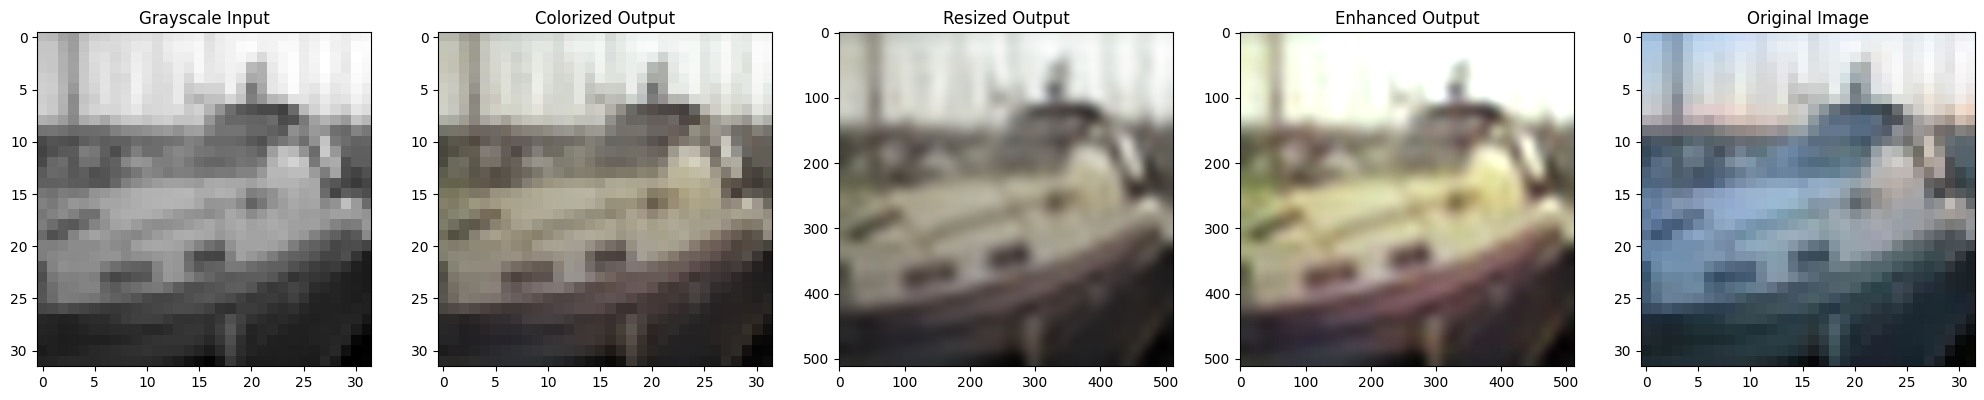

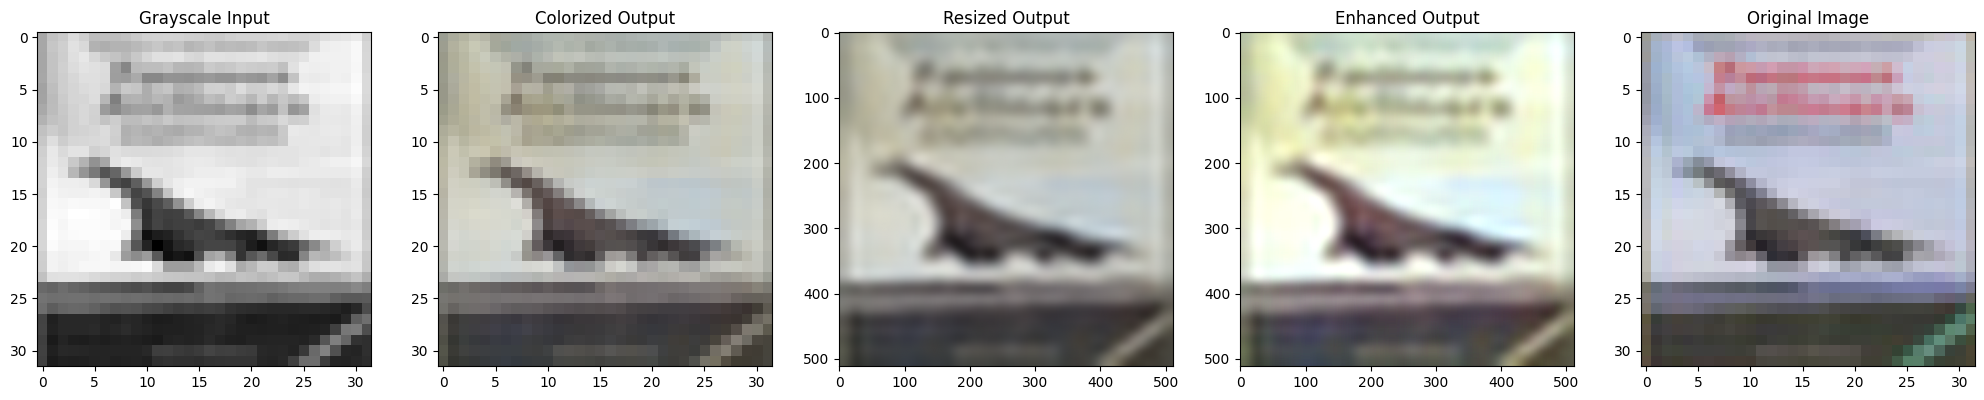

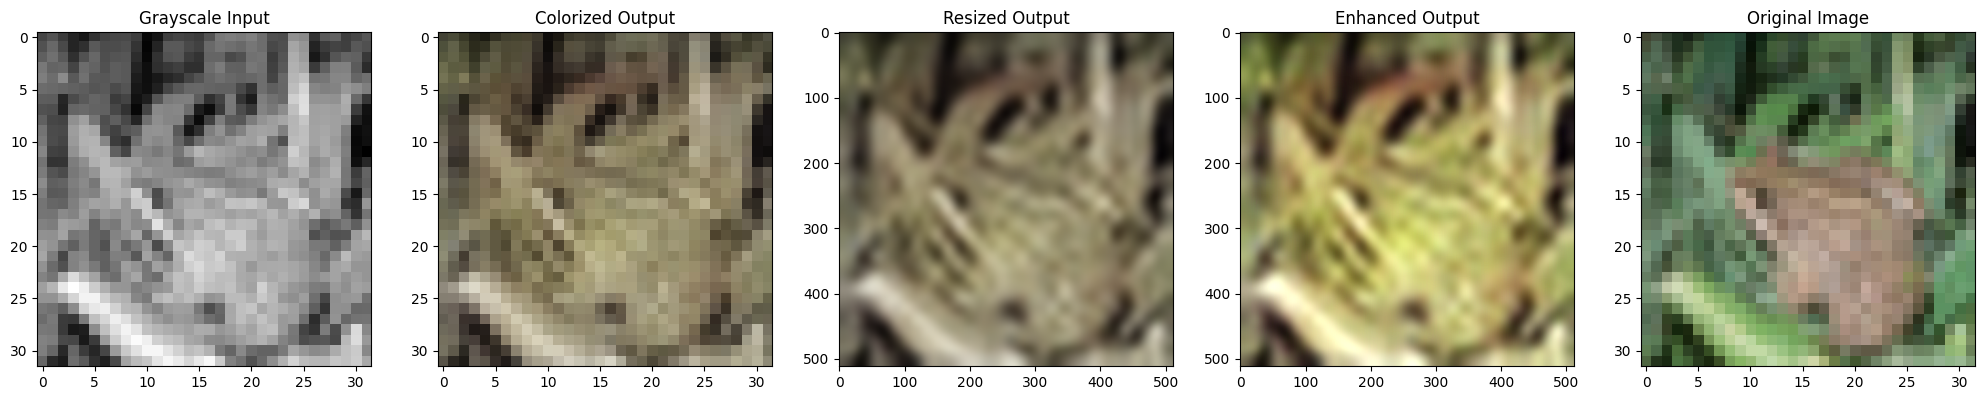

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from PIL import Image
from scipy.ndimage import gaussian_filter

# Load CIFAR-10 data
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert to grayscale images
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_test_gray = tf.image.rgb_to_grayscale(x_test)

# Build the CNN Model
model = Sequential([
    InputLayer(input_shape=(32, 32, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('colorization_model.keras', save_best_only=True, monitor='val_loss', save_weights_only=False)

model.fit(x_train_gray, x_train, epochs=5, batch_size=128, validation_data=(x_test_gray, x_test), callbacks=[early_stopping, checkpoint])

# Test the model
output = model.predict(x_test_gray)

# Resize function
def resize_image(image, new_size):
    pil_image = Image.fromarray((image * 255).astype(np.uint8))
    resized_image = pil_image.resize(new_size, Image.LANCZOS)
    return np.array(resized_image) / 255.0

# Unsharp mask for enhancement
def unsharp_mask(image, sigma=1.0, strength=1.5):
    blurred = gaussian_filter(image, sigma=sigma)
    sharpened = image + strength * (image - blurred)
    return np.clip(sharpened, 0, 1)

# Adjust brightness
def adjust_brightness(image, factor=1.2):
    return np.clip(image * factor, 0, 1)

# Display the results
def display_images(grayscale_input, colorized_output, resized_output, enhanced_output, original):
    fig, ax = plt.subplots(1, 5, figsize=(25, 5))
    ax[0].imshow(tf.squeeze(grayscale_input), cmap='gray')
    ax[0].set_title('Grayscale Input')
    ax[1].imshow(colorized_output)
    ax[1].set_title('Colorized Output')
    ax[2].imshow(resized_output)
    ax[2].set_title('Resized Output')-
    ax[3].imshow(enhanced_output)
    ax[3].set_title('Enhanced Output')-
    ax[4].imshow(original)
    ax[4].set_title('Original Image')
    plt.show()

# Display some sample images
for i in range(5):
    colorized_image = output[i]
    resized_image = resize_image(colorized_image, (512, 512))
    enhanced_image = unsharp_mask(resized_image)
    enhanced_image = adjust_brightness(enhanced_image)
    display_images(x_test_gray[i], colorized_image, resized_image, enhanced_image, x_test[i])


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 151ms/step - loss: 0.0170 - val_loss: 0.0060
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 147ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 142ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 147ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - loss: 0.0054 - val_loss: 0.0053
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


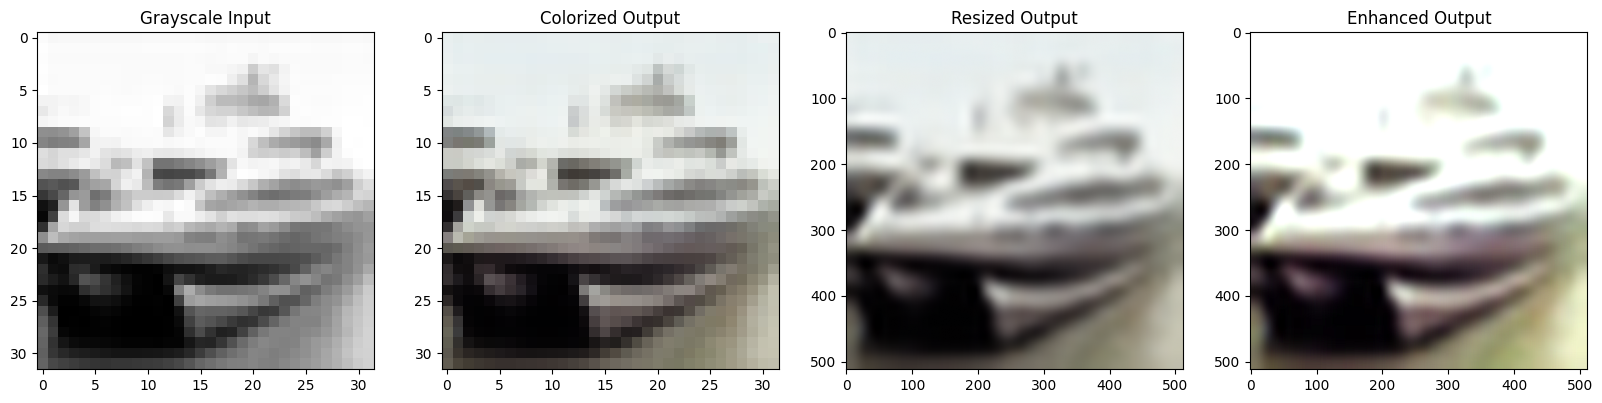

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from tensorflow.keras.datasets import cifar10
from PIL import Image
from scipy.ndimage import gaussian_filter

# Load CIFAR-10 data
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert to grayscale images
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_test_gray = tf.image.rgb_to_grayscale(x_test)

# Build the CNN Model
model = Sequential([
    InputLayer(input_shape=(32, 32, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('colorization_model.keras', save_best_only=True, monitor='val_loss', save_weights_only=False)

model.fit(x_train_gray, x_train, epochs=5, batch_size=128, validation_data=(x_test_gray, x_test), callbacks=[early_stopping, checkpoint])

# Test the model
output = model.predict(x_test_gray)

# Resize function
def resize_image(image, new_size):
    pil_image = Image.fromarray((image * 255).astype(np.uint8))
    resized_image = pil_image.resize(new_size, Image.LANCZOS)
    return np.array(resized_image) / 255.0

# Unsharp mask for enhancement
def unsharp_mask(image, sigma=1.0, strength=1.5):
    blurred = gaussian_filter(image, sigma=sigma)
    sharpened = image + strength * (image - blurred)
    return np.clip(sharpened, 0, 1)

# Adjust brightness
def adjust_brightness(image, factor=1.2):
    return np.clip(image * factor, 0, 1)

# Function to generate animation frames
def update_frame(i, grayscale_input, colorized_output, resized_output, enhanced_output):
    ax[0].imshow(tf.squeeze(grayscale_input), cmap='gray')
    ax[0].set_title('Grayscale Input')
    ax[1].imshow(colorized_output)
    ax[1].set_title('Colorized Output')
    ax[2].imshow(resized_output)
    ax[2].set_title('Resized Output')
    ax[3].imshow(enhanced_output)
    ax[3].set_title('Enhanced Output')

# Select a sample image
i = 1
colorized_image = output[i]
resized_image = resize_image(colorized_image, (512, 512))
enhanced_image = unsharp_mask(resized_image)
enhanced_image = adjust_brightness(enhanced_image)

# Create the figure and axis
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Create the animation
anim = FuncAnimation(
    fig, update_frame, fargs=(x_test_gray[i], colorized_image, resized_image, enhanced_image),
    frames=1, repeat=False
)

# Save the animation as a GIF
anim.save('colorization_animation.gif', writer=PillowWriter(fps=1))

# Show the animation
plt.show()
